In [2]:
import json
import ast
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

def load_q_values(filename):
    """Load Q–values from a JSON file."""
    with open(filename, 'r') as f:
        data = json.load(f)
    return data['q_values']

def parse_state_key(key):
    """Convert a string key like '(-2, 0, -1, 0)' to a tuple of numbers."""
    return ast.literal_eval(key)

def extract_surface_data(q_values, dim_x, dim_y):
    """
    Process all states without filtering.
    
    For each state, extract the values corresponding to the selected dimensions,
    and compute the maximum Q–value as the z–value.
    
    Parameters:
        q_values (dict): Mapping from state-string to list of Q–values.
        dim_x (int): Index (0–3) for the x–axis (e.g., pose_cart).
        dim_y (int): Index (0–3) for the y–axis (e.g., vel_cart).
    
    Returns:
        mapping (dict): A dictionary mapping (x, y) pairs to z (max Q–value).
    """
    mapping = {}
    for key, q_list in q_values.items():
        state = parse_state_key(key)
        x = state[dim_x]
        y = state[dim_y]
        # Use the maximum Q value for the state as the z value
        z = max(q_list)
        mapping[(x, y)] = z
    return mapping

def create_grid(mapping):
    """
    Construct a mesh grid from the (x, y) keys in the mapping and fill in the z values.
    
    Parameters:
        mapping (dict): Dictionary with keys (x, y) and value z.
    
    Returns:
        X, Y, Z (ndarrays): 2D arrays representing the mesh grid and corresponding z values.
    """
    # Get unique sorted x and y values
    x_unique = np.sort(np.unique([pt[0] for pt in mapping.keys()]))
    y_unique = np.sort(np.unique([pt[1] for pt in mapping.keys()]))
    
    # Create mesh grid
    X, Y = np.meshgrid(x_unique, y_unique, indexing='ij')
    
    # Initialize Z and fill from mapping; missing points are set as np.nan
    Z = np.full(X.shape, np.nan, dtype=float)
    for i, xv in enumerate(x_unique):
        for j, yv in enumerate(y_unique):
            if (xv, yv) in mapping:
                Z[i, j] = mapping[(xv, yv)]
    return X, Y, Z

def plot_surface(X, Y, Z, dim_x, dim_y):
    """
    Plot a 3D surface using the mesh grid data.
    
    Parameters:
        X, Y (ndarray): 2D arrays for the x– and y–axes.
        Z (ndarray): 2D array for the z–axis (max Q–value).
        dim_x (int): Index used for the x–axis.
        dim_y (int): Index used for the y–axis.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface with a colormap for continuous variation in Q–values
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_xlabel(f"State Dimension {dim_x} (e.g., pose_cart)")
    ax.set_ylabel(f"State Dimension {dim_y} (e.g., vel_cart)")
    ax.set_zlabel("Max Q–Value")
    ax.set_title("Surface Plot of Maximum Q–Value over All States")
    fig.colorbar(surf, shrink=0.5, aspect=5, label="Max Q–Value")
    plt.show()

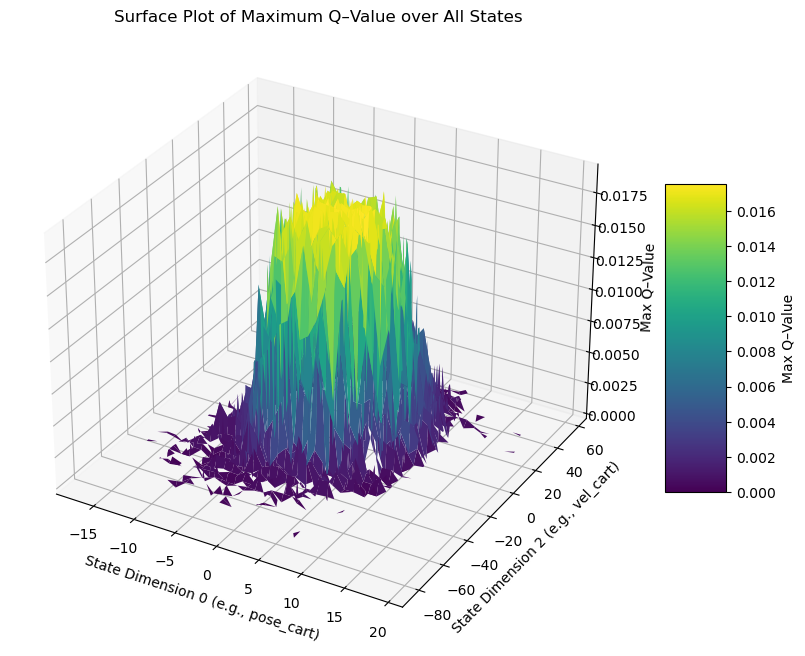

In [3]:
# File containing Q-values
filename = '/home/beamkeerati/DRL-HW2/CartPole_4.2.0/q_value/Stabilize/Q_Learning/Q_Learning_9900_10_15.0_10_0.json'
q_values = load_q_values(filename)

# Select two state dimensions (0: pose_cart, 1: pose_pole, 2: vel_cart, 3: vel_pole)
dim_x = 0  # e.g., pose_cart
dim_y = 2  # e.g., vel_cart

# Extract data without filtering; for each state, compute z = max(q_values)
mapping = extract_surface_data(q_values, dim_x, dim_y)

# Create a regular grid for plotting
X, Y, Z = create_grid(mapping)

# Plot the surface using the grid data
plot_surface(X, Y, Z, dim_x, dim_y)

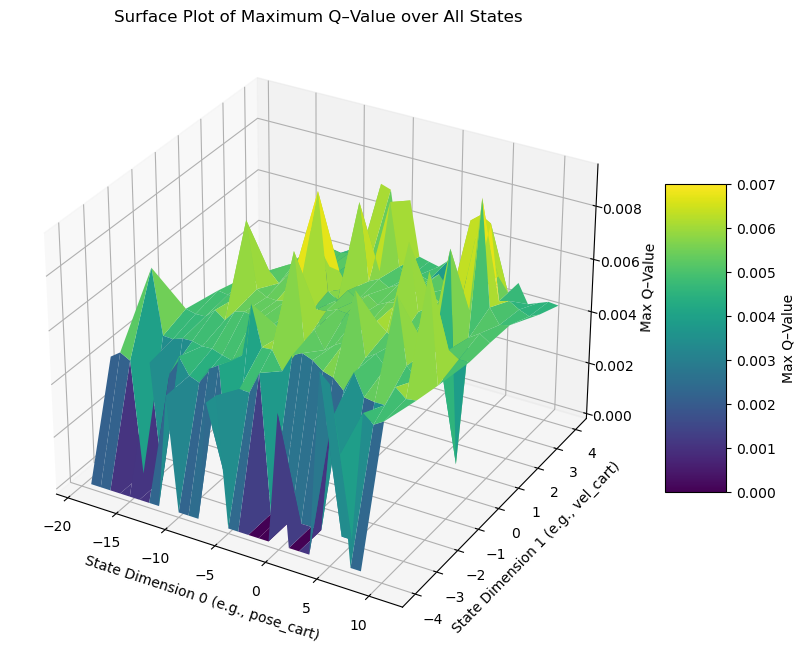

In [4]:
# File containing Q-values
filename = '/home/beamkeerati/DRL-HW2/CartPole_4.2.0/q_value/Stabilize/Q_Learning/Q_Learning_9900_7_15.0_10_10.json'
q_values = load_q_values(filename)

# Select two state dimensions (0: pose_cart, 1: pose_pole, 2: vel_cart, 3: vel_pole)
dim_x = 0  # e.g., pose_cart
dim_y = 1  # e.g., vel_cart

# Extract data without filtering; for each state, compute z = max(q_values)
mapping = extract_surface_data(q_values, dim_x, dim_y)

# Create a regular grid for plotting
X, Y, Z = create_grid(mapping)

# Plot the surface using the grid data
plot_surface(X, Y, Z, dim_x, dim_y)

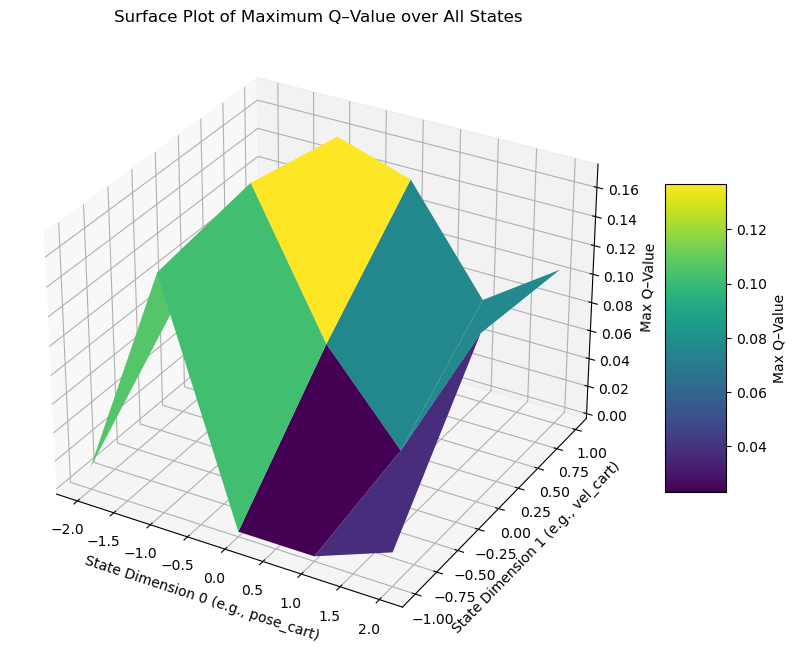

In [5]:
# File containing Q-values
filename = '/home/beamkeerati/DRL-HW2/CartPole_4.2.0/q_value/Stabilize/MC/MC_900_10_15.0_1_3.json'
q_values = load_q_values(filename)

# Select two state dimensions (0: pose_cart, 1: pose_pole, 2: vel_cart, 3: vel_pole)
dim_x = 0  # e.g., pose_cart
dim_y = 1  # e.g., vel_cart

# Extract data without filtering; for each state, compute z = max(q_values)
mapping = extract_surface_data(q_values, dim_x, dim_y)

# Create a regular grid for plotting
X, Y, Z = create_grid(mapping)

# Plot the surface using the grid data
plot_surface(X, Y, Z, dim_x, dim_y)